# Heart Attack Prediction

#### Life cycle of Project

- Understanding the Problem Statement
- Data Collection
- Data Checks
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Objective

### 2) Data Collection
- Dataset Source - 
- The data consists of 16 column and 4240 rows.

### 2.1 Importing Libraries

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_csv('data/US_Heart_Patients_raw.csv')

In [48]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BP Meds,prevalentStroke,prevalentHyp,diabetes,tot cholesterol,Systolic BP,Diastolic BP,BMI,heartRate,glucose,Heart-Att
0,Male,39.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48.0,1.0,1.0,20.0,0.0,0.0,0.0,0.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61.0,3.0,1.0,30.0,0.0,0.0,1.0,0.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [49]:
df.shape

(4240, 16)

### 2.2 Dataset information
- Gender - Male/Female
- age
- education
- currentSmoker - Yes/No
- cigsPerDay
- BP_Meds - Yes/No
- prevalentStroke - Yes/No
- prevalentHyp - Yes/No
- diabetes - Yes/No
- tot_cholesterol
- Systolic_BP
- Diastolic_BP
- BMI
- heartRate
- glucose
- Heart_Attack - Yes/No

#### Modifying Column DataType & Column Names for Ease in interpretation

In [50]:
df.columns

Index(['Gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BP Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'tot cholesterol',
       'Systolic BP', 'Diastolic BP', 'BMI', 'heartRate', 'glucose',
       'Heart-Att'],
      dtype='str')

In [51]:
df.rename(columns={'BP Meds':'BP_Meds',
                  'tot cholesterol':'tot_cholesterol',
                  'Systolic BP':'Systolic_BP',
                 'Diastolic BP':'Diastolic_BP',
                  'Heart-Att':'Heart_Attack'},inplace=True)

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set

### 3.1 Checking missing values

In [52]:
df.isnull().sum()

Gender               8
age                  2
education          110
currentSmoker        3
cigsPerDay          31
BP_Meds             60
prevalentStroke      9
prevalentHyp         2
diabetes             2
tot_cholesterol     60
Systolic_BP          4
Diastolic_BP         5
BMI                 24
heartRate            4
glucose            391
Heart_Attack         0
dtype: int64

### 3.2 Checking Duplicates

In [53]:
df.duplicated().sum()

np.int64(0)

### 3.3 Checking Data Types

In [54]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   str    
 1   age              4238 non-null   float64
 2   education        4130 non-null   float64
 3   currentSmoker    4237 non-null   float64
 4   cigsPerDay       4209 non-null   float64
 5   BP_Meds          4180 non-null   float64
 6   prevalentStroke  4231 non-null   float64
 7   prevalentHyp     4238 non-null   float64
 8   diabetes         4238 non-null   float64
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart_Attack     4240 non-null   int64  
dtypes: float64(14), int64(1), str(1)
memory usage: 530.1 KB


#### Some columns datatype needs to be changed to categorical Varibles

In [55]:
cat = ['education', 'currentSmoker', 'BP_Meds',
       'prevalentStroke', 'prevalentHyp', 'diabetes']
for i in cat:
    df[i] = df[i].astype('object')

df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4232 non-null   str    
 1   age              4238 non-null   float64
 2   education        4130 non-null   object 
 3   currentSmoker    4237 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BP_Meds          4180 non-null   object 
 6   prevalentStroke  4231 non-null   object 
 7   prevalentHyp     4238 non-null   object 
 8   diabetes         4238 non-null   object 
 9   tot_cholesterol  4180 non-null   float64
 10  Systolic_BP      4236 non-null   float64
 11  Diastolic_BP     4235 non-null   float64
 12  BMI              4216 non-null   float64
 13  heartRate        4236 non-null   float64
 14  glucose          3849 non-null   float64
 15  Heart_Attack     4240 non-null   int64  
dtypes: float64(8), int64(1), object(6), str(1)
memory usage: 530.1+ KB


### 3.4 Unique values in each column

In [17]:
df.nunique()

Gender                2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BP_Meds               2
prevalentStroke       2
prevalentHyp          2
diabetes              2
tot_cholesterol     248
Systolic_BP         234
Diastolic_BP        146
BMI                1363
heartRate            72
glucose             143
Heart_Attack          2
dtype: int64

### 3.5 Statistics of the data

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4238.0,49.579283,8.572875,32.00,42.00,49.000,56.00,70.0
cigsPerDay,4209.0,9.001901,11.920742,0.00,0.00,0.000,20.00,70.0
tot_cholesterol,4180.0,236.677273,44.616098,107.00,206.00,234.000,263.00,696.0
Systolic_BP,4236.0,132.362370,22.039244,83.50,117.00,128.000,144.00,295.0
Diastolic_BP,4235.0,82.901889,11.914467,48.00,75.00,82.000,90.00,142.5
BMI,4216.0,25.798916,4.075256,15.54,23.07,25.395,28.04,56.8
heartRate,4236.0,75.867800,11.999488,44.00,68.00,75.000,83.00,143.0
glucose,3849.0,81.951936,23.958428,40.00,71.00,78.000,87.00,394.0


#### Seggregating categorical and numerical columns

In [56]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols=df.select_dtypes(include=['int64','float64']).columns.tolist()
print('We have {} numerical features : {}'.format(len(num_cols), num_cols))
print('We have {} categorical features : {}'.format(len(cat_cols), cat_cols))

We have 9 numerical features : ['age', 'cigsPerDay', 'tot_cholesterol', 'Systolic_BP', 'Diastolic_BP', 'BMI', 'heartRate', 'glucose', 'Heart_Attack']
We have 7 categorical features : ['Gender', 'education', 'currentSmoker', 'BP_Meds', 'prevalentStroke', 'prevalentHyp', 'diabetes']


In [57]:
for col in cat_cols:
    print("Categories:     ",col,end=" " )
    print(df[col].dropna().unique())

Categories:      Gender <StringArray>
['Male', 'Female']
Length: 2, dtype: str
Categories:      education [4.0 2.0 1.0 3.0]
Categories:      currentSmoker [0.0 1.0]
Categories:      BP_Meds [0.0 1.0]
Categories:      prevalentStroke [0.0 1.0]
Categories:      prevalentHyp [0.0 1.0]
Categories:      diabetes [0.0 1.0]


### 4) Exploratory Data Analysis

### 4.1 Univariate Analysis

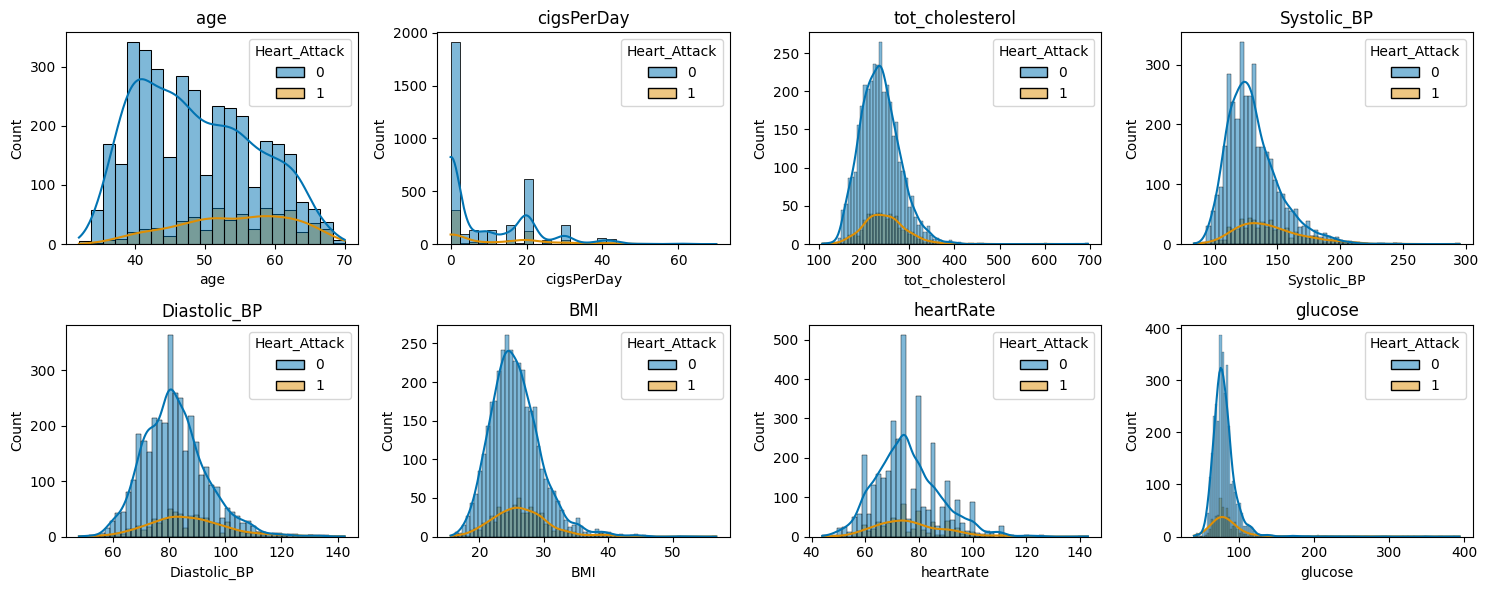

In [61]:
fig, ax = plt.subplots(2, 4, figsize=(15, 6))
ax = ax.flatten()
palette=sns.color_palette("colorblind")

for i, col in enumerate(num_cols[:-1]):
    sns.histplot(data=df, x=col, kde=True, hue='Heart_Attack', palette=palette, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

#### Insights
- Feature distributions for heart attack and non-heart attack cases overlap substantially.
- Similar value ranges are observed across most variables for both classes.
- Heart attack occurrence depends on the combined effect of multiple factors.

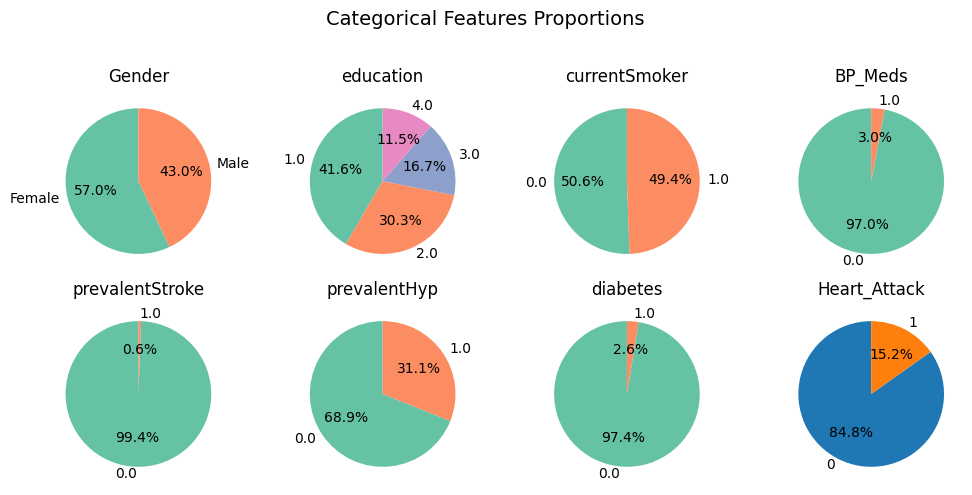

In [69]:
fig, ax = plt.subplots(2, 4, figsize=(10, 5))
ax = ax.flatten()

for i, col in enumerate(cat_cols):  
    counts = df[col].value_counts()

    ax[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('Set2')

    )
    ax[i].set_title(col)

ax[7].pie(
    df['Heart_Attack'].value_counts(),
    labels=df['Heart_Attack'].value_counts().index,
    autopct='%1.1f%%',
    startangle=90
)
ax[7].set_title('Heart_Attack')

fig.suptitle('Categorical Features Proportions\n', fontsize=14)
plt.tight_layout()
plt.show()

#### Insights
- There is clearly a class imbalance in heart attack risk, with significantly fewer heart attack cases compared to non-heart attack cases.

### 4.2 Bivariate Analysis

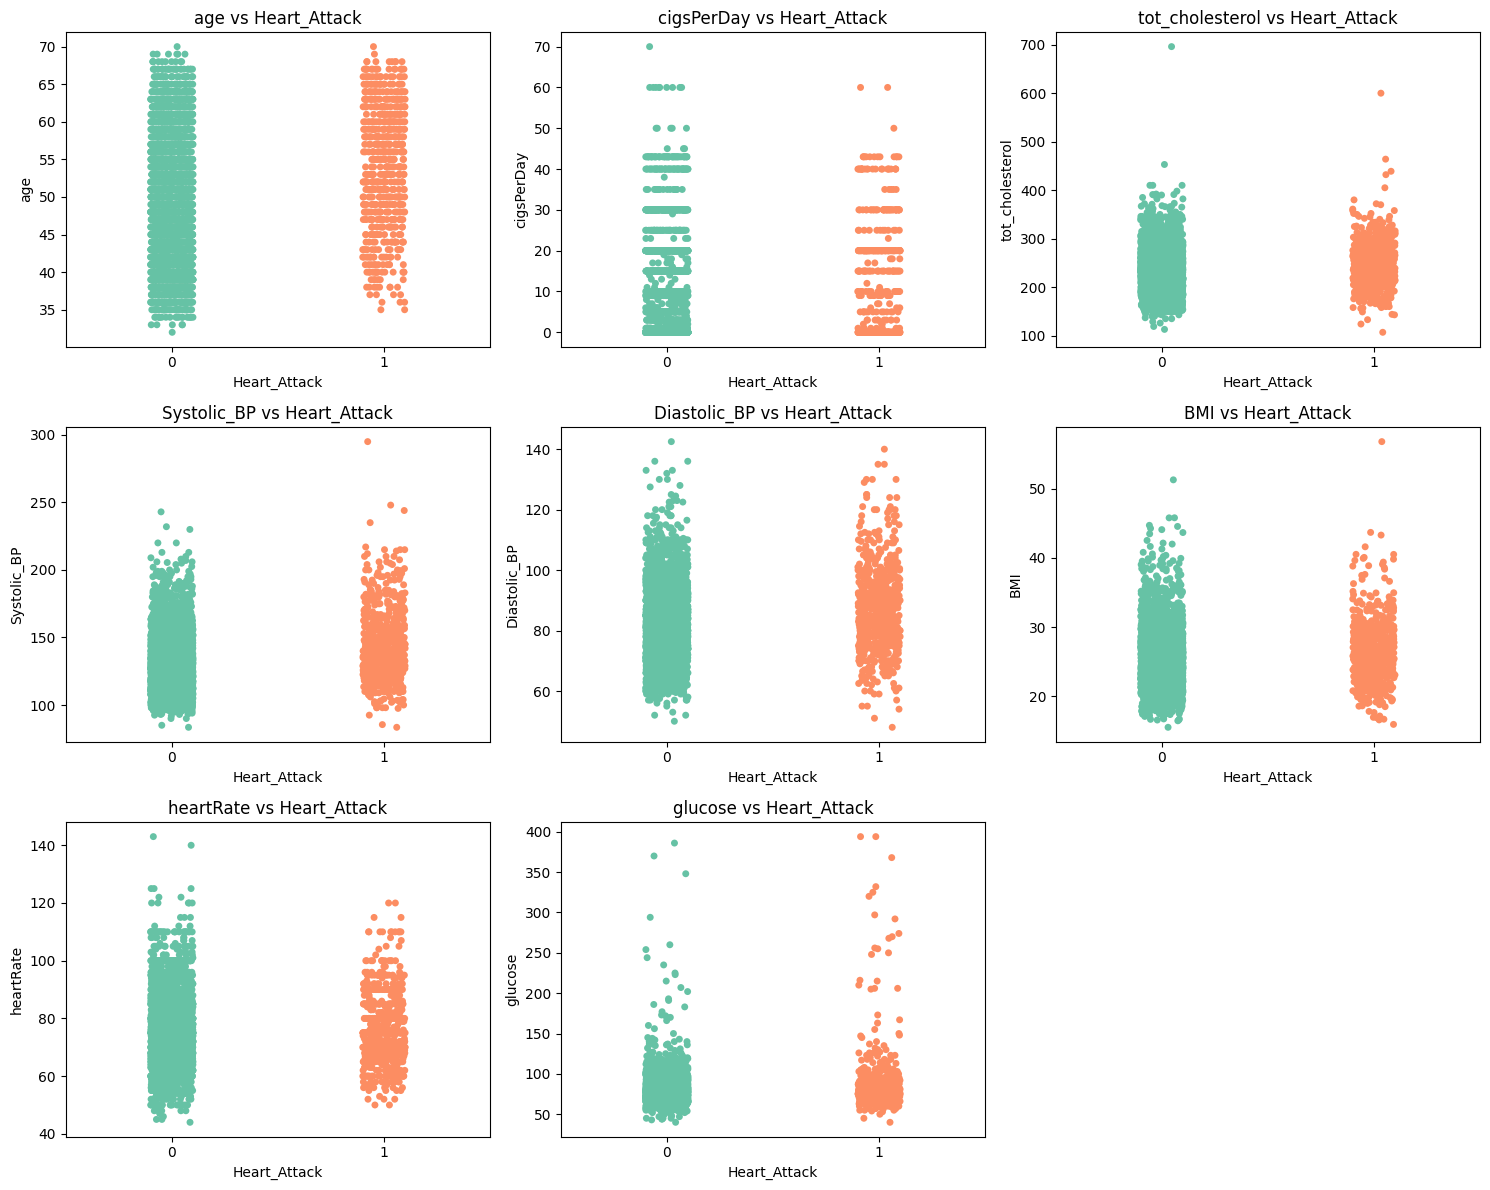

In [74]:
fig,ax=plt.subplots(3,3,figsize=(15,12))
ax=ax.flatten()

target='Heart_Attack'

for i,col in enumerate(num_cols[:-1]):
    sns.stripplot(x=target, y=col, data=df, jitter=True,palette='Set2',ax=ax[i])
    ax[i].set_title(f'{col} vs {target}')
    
ax[8].axis('off')
plt.tight_layout()
plt.show()

#### Insights
- Individuals aged over 50 years exhibit a higher risk of heart attack.
- Most heart attack cases fall within cholesterol levels of 200–300 mg/dL.
- Heart attack risk is observed within the 60–100 bpm heart rate range, including near-normal values.
- Glucose levels vary based on fasting status and should be interpreted with caution.

### 4.3 Multivariate Analysis

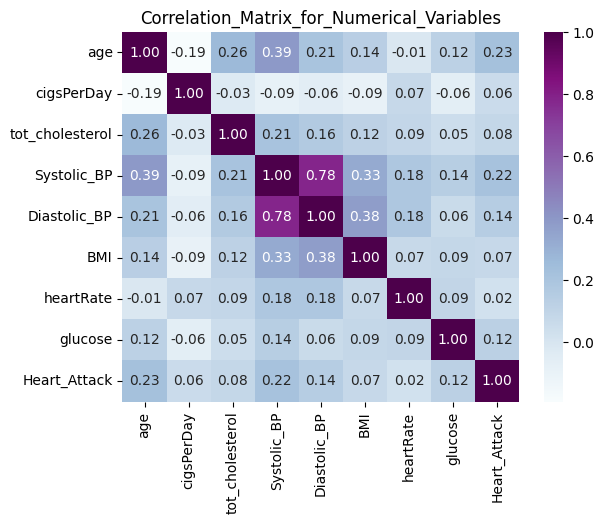

In [75]:
sns.heatmap(df[num_cols].corr(),annot=True,fmt='.2f',cmap="BuPu")
plt.title('Correlation_Matrix_for_Numerical_Variables')
plt.show()

#### Insights
- Systolic and diastolic blood pressure show a strong positive correlation (0.78), which may introduce multicollinearity in regression models, though its impact on classification models may be limited.
- Heart_Attack shows a better correlation with age and Systolic_BP

### 4.4 Checking Outiers

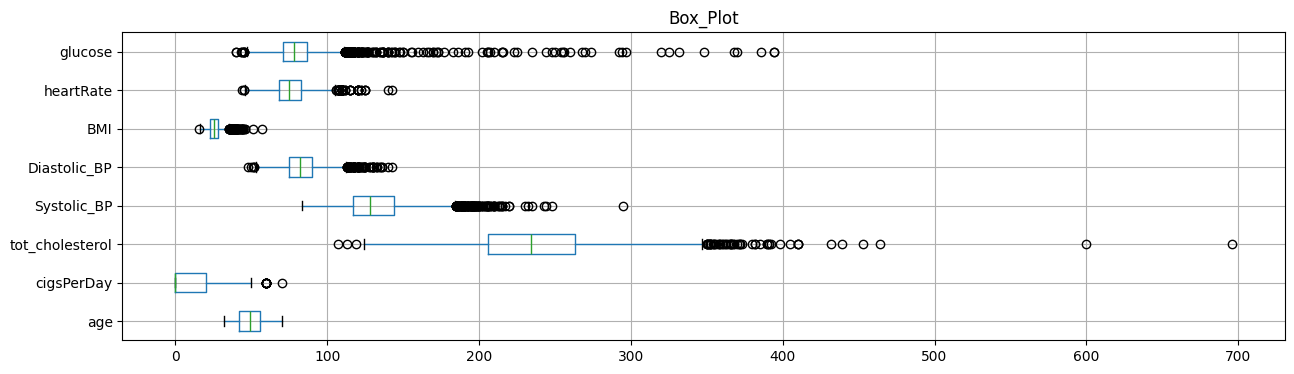

In [88]:
plt.figure(figsize=(15,4))
df[num_cols[:-1]].boxplot(vert=False)
plt.title('Box_Plot')
plt.show()

In [26]:
data = {
    "Category": ["Normal", "Impaired Glucose", "Diabetic"],
    "Fasting (mg/dL)": ["80–100", "101–125", "126+"],
    "After Eating (mg/dL)": ["170–200", "190–230", "220–300"],
    "2–3 Hours After Eating (mg/dL)": ["120–140", "140–160", "200+"]
}
df_glucose_levels = pd.DataFrame(data)
df_glucose_levels #These outliers for glucose may be high glucose level,outlier handling can be done with dropping this columns

,Category,Fasting (mg/dL),After Eating (mg/dL),2–3 Hours After Eating (mg/dL)
0,Normal,80–100,170–200,120–140
1,Impaired Glucose,101–125,190–230,140–160
2,Diabetic,126+,220–300,200+


#### Insights
- From the chart, glucose outliers do not appear to require treatment, as glucose levels can naturally vary due to factors such as fasting or recent food intake.

### 5) Data Preprocessing
- Imputing nulls by mean,medain,mode,knn_imputer
- Collapsing outliers to min and max values

### 5.1 Null value imputation
- If there is more that 70% null in any feature, we gonna drop that feature

In [27]:
((df.isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

glucose            9.221698
education          2.594340
tot_cholesterol    1.415094
BP_Meds            1.415094
cigsPerDay         0.731132
BMI                0.566038
prevalentStroke    0.212264
Gender             0.188679
Diastolic_BP       0.117925
heartRate          0.094340
Systolic_BP        0.094340
currentSmoker      0.070755
prevalentHyp       0.047170
age                0.047170
diabetes           0.047170
Heart_Attack       0.000000
dtype: float64

### 5.1.1 Null imputation using mode

In [77]:
for col in cat_cols:
    mode=df[col].mode()[0]
    df[col]=df[col].fillna(mode)

### 5.1.2 Null imputation using mean,median,knn_imputer
- Created new dataframes with these imputations on num features

In [78]:
df_mean=df.copy()
df_median=df.copy()
df_knn=df.copy()

In [79]:
for col in num_cols:
    df_mean[col]=df_mean[col].fillna(df_mean[col].mean())
for col in num_cols:
    df_median[col]=df_median[col].fillna(df_median[col].median())

In [80]:
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=5)
df_knn[num_cols]=imputer.fit_transform(df_knn[num_cols])

### 5.2 Handling Outliers
- From above insights we are not collapsing outliers for glucose feature
- Created new dataframes where outliers were treated

In [81]:
df_mean_out=df_mean.copy()
df_median_out=df_median.copy()
df_knn_out=df_knn.copy()

In [82]:
def remove_outlier(data):
    Q1,Q3=np.percentile(data,[25,75])
    IQR=Q3-Q1

    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR

    return lower,upper

In [83]:
for col in df_mean_out[num_cols].drop(columns=['glucose','Heart_Attack']).columns:
    lower,upper=remove_outlier(df_mean_out[col])
    df_mean_out[col]=np.where(df_mean_out[col]>upper,upper,df_mean_out[col])
    df_mean_out[col]=np.where(df_mean_out[col]<lower,lower,df_mean_out[col])

In [84]:
for col in df_median_out[num_cols].drop(columns=['glucose','Heart_Attack']).columns:
    lower,upper=remove_outlier(df_median_out[col])
    df_median_out[col]=np.where(df_median_out[col]>upper,upper,df_median_out[col])
    df_median_out[col]=np.where(df_median_out[col]<lower,lower,df_median_out[col])

In [85]:
for col in df_knn_out[num_cols].drop(columns=['glucose','Heart_Attack']).columns:
    lower,upper=remove_outlier(df_knn_out[col])
    df_knn_out[col]=np.where(df_knn_out[col]>upper,upper,df_knn_out[col])
    df_knn_out[col]=np.where(df_knn_out[col]<lower,lower,df_knn_out[col])

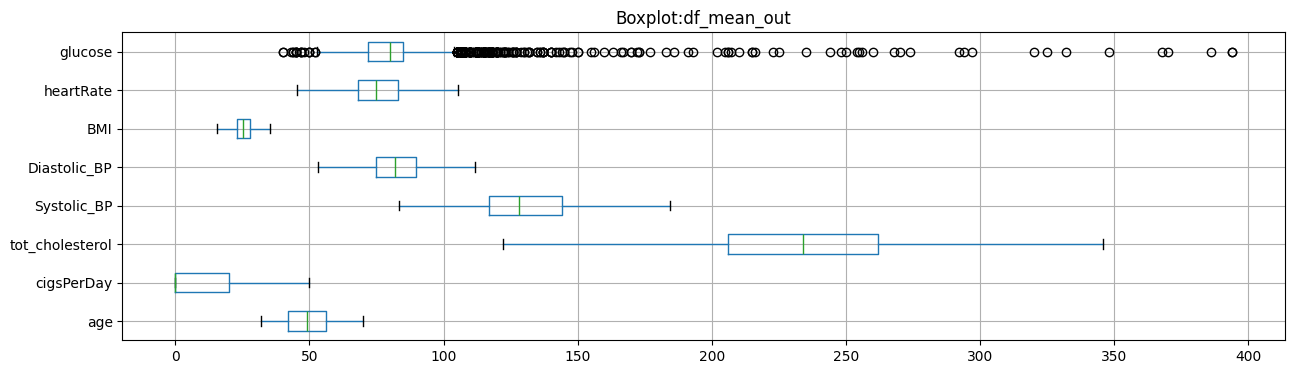

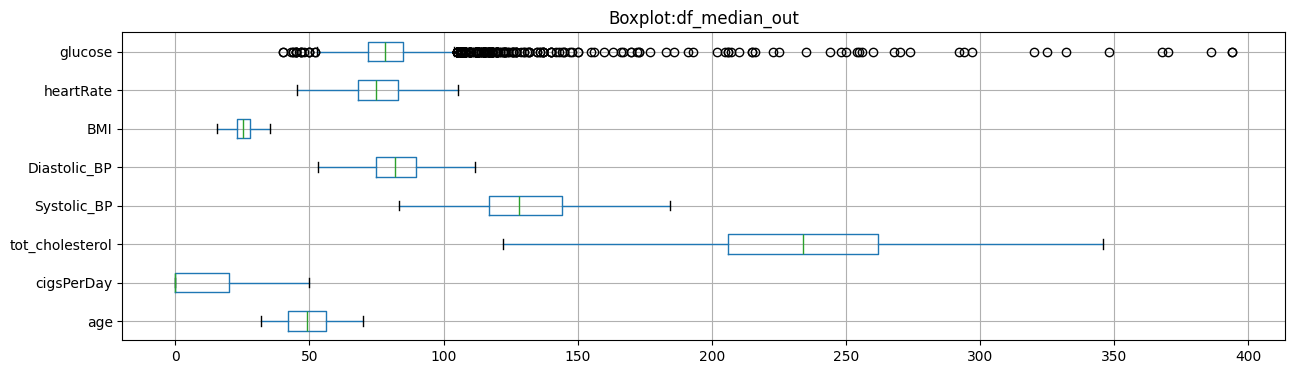

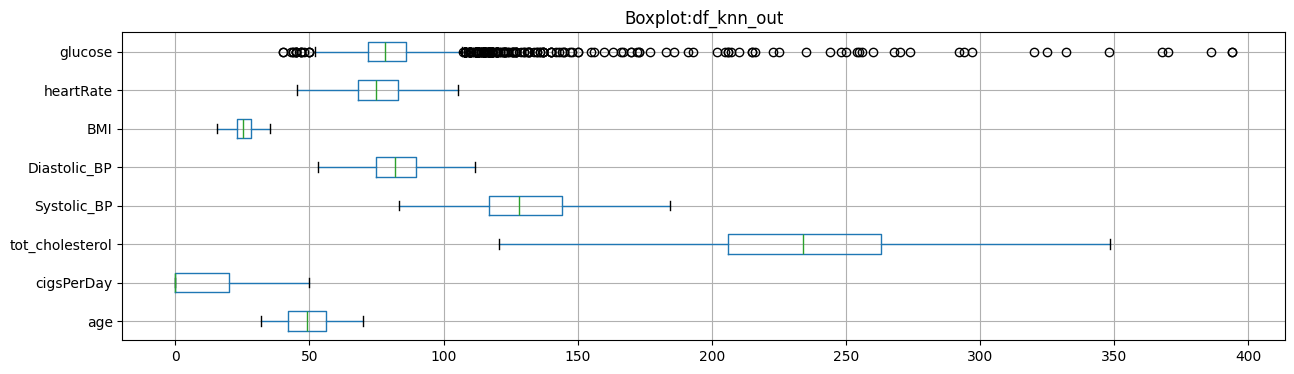

In [89]:
for name,DF in zip(['df_mean_out','df_median_out','df_knn_out'],[df_mean_out,df_median_out,df_knn_out]):
    plt.figure(figsize=(15,4))
    DF[num_cols[:-1]].boxplot(vert=False)
    plt.title(f'Boxplot:{name}')
    plt.show()

### 5.3 Preparing X and Y variables

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
def data_split(data):
    X = data.drop(columns='Heart_Attack')
    y = data['Heart_Attack']

    return X,y

### 5.4 Scaling and Encoding

In [92]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [107]:
categorical_cols=cat_cols
numerical_cols=num_cols[:-1]

### 6) Model Training

#### Importing models

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Importing metrics

In [99]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

In [109]:
dataframes = {
    'df_mean': df_mean,
    'df_median': df_median,
    'df_knn': df_knn,
    'df_mean_out': df_mean_out,
    'df_median_out': df_median_out,
    'df_knn_out': df_knn_out
}

models = {
    "NaiveBayes": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

param_grids = {
    "NaiveBayes": {
        'classifier__var_smoothing': np.logspace(0, -9, num=100)
    },
    
    "DecisionTree": {
        'classifier__max_depth': [3, 5, 7, 10, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_features': ['sqrt', 'log2', None]
    },
    
    "RandomForest": {
        'classifier__n_estimators': [50, 100],
        'classifier__max_depth': [5, 10, None],
        'classifier__min_samples_split': [2, 10],
        'classifier__min_samples_leaf': [1, 2],
        'classifier__max_features': ['sqrt', 'log2']
    },
    
    "AdaBoost": {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 1.0],
    },
    
    "GradientBoosting": {
        'classifier__n_estimators': [100, 200],
        'classifier__learning_rate': [0.05, 0.1],
        'classifier__max_depth': [3, 5],
        'classifier__min_samples_split': [2, 5],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__subsample': [0.8, 1.0]
    },
    
    "KNN": {
        'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan'],
    }
}

In [110]:
results=[]


for df_name,df in dataframes.items():

    # Split the data
    X,y = data_split(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", OneHotEncoder(sparse_output=False), categorical_cols), 
    ("StandardScaler", StandardScaler(), numerical_cols)     # Separating target column
    ])
    
    # Loop over each model
    for model_name,model in models.items():
        
        # Defining pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])

        #Hyperparameter Tuning
        grid_search = GridSearchCV(
            pipeline,
            param_grids[model_name],
            cv=5, 
            scoring='recall'
        )
        
        # Train the model
        grid_search.fit(X_train, y_train)

        # Best model
        best_model = grid_search.best_estimator_
        
        # Predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        # Probability predictions for ROC-AUC
        y_proba_train = best_model.predict_proba(X_train)[:, 1]
        y_proba_test = best_model.predict_proba(X_test)[:, 1]

        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
        
        result = {
            'Dataframe' : df_name,
            'Model_name': model_name,
            'Recall_Train': round(recall_score(y_train, y_train_pred), 2),
            'Recall_Test': round(recall_score(y_test, y_test_pred), 2),
            'Precision_Train': round(precision_score(y_train, y_train_pred), 2),
            'Precision_Test': round(precision_score(y_test, y_test_pred), 2),
            'Accuracy_Train': round(accuracy_score(y_train, y_train_pred), 2),
            'Accuracy_Test': round(accuracy_score(y_test, y_test_pred), 2),
            'F1_Train':round(f1_score(y_train, y_train_pred), 2),
            'F1_Test': round(f1_score(y_test, y_test_pred), 2),
            'ROC_AUC_Train': round(auc(fpr_train, tpr_train), 2),
            'ROC_AUC_Test': round(auc(fpr_test, tpr_test), 2) 
        }
        
        results.append(result)

#### Handling Class imbalance
- Since the target variable is skewed toward the “No Heart Attack” class, imbalance handling techniques were required to avoid biased model predictions.
- To overcome this, SMOTE was used with Naive Bayes and KNN to balance the dataset. For Decision Tree and Random Forest, class weights were adjusted so that the models give more importance to the minority class.

In [111]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

### SMOTE

In [112]:
models_smote={
    "NaiveBayes(smote)": GaussianNB(),
    "KNN(smote)": KNeighborsClassifier()    
}

param_grid_smote = {
    "NaiveBayes(smote)": {
        'classifier__var_smoothing': np.logspace(0, -9, num=100)
    },
    
    "KNN(smote)": {
        'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan'],
        'classifier__p': [1, 2]
    }
}

In [113]:
results_smote=[]


for df_name,df in dataframes.items():

    # Split the data
    X,y = data_split(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", OneHotEncoder(sparse_output=False), categorical_cols),  
    ("StandardScaler", StandardScaler(), numerical_cols)     # Separating target column
    ])
    
    # Loop over each model
    for model_name_smote,model_smote in models_smote.items():
        
        # Defining pipeline
        impipeline = ImbPipeline(steps=[
            ('preprocessor', preprocessor),
            ('smote',SMOTE(random_state=42)),
            ('classifier', model_smote)
        ])

        #Hyperparameter Tuning
        grid_search = GridSearchCV(
            impipeline,
            param_grid_smote[model_name_smote],
            cv=5, 
            scoring='recall'
        )
        
        # Train the model
        grid_search.fit(X_train, y_train)

        # Best model
        best_model = grid_search.best_estimator_
        
        # Predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        # Probability predictions for ROC-AUC
        y_proba_train = best_model.predict_proba(X_train)[:, 1]
        y_proba_test = best_model.predict_proba(X_test)[:, 1]

        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
        
        result_smote = {
            'Dataframe' : df_name,
            'Model_name': model_name_smote,
            'Recall_Train': round(recall_score(y_train, y_train_pred), 2),
            'Recall_Test': round(recall_score(y_test, y_test_pred), 2),
            'Precision_Train': round(precision_score(y_train, y_train_pred), 2),
            'Precision_Test': round(precision_score(y_test, y_test_pred), 2),
            'Accuracy_Train': round(accuracy_score(y_train, y_train_pred), 2),
            'Accuracy_Test': round(accuracy_score(y_test, y_test_pred), 2),
            'F1_Train':round(f1_score(y_train, y_train_pred), 2),
            'F1_Test': round(f1_score(y_test, y_test_pred), 2),
            'ROC_AUC_Train': round(auc(fpr_train, tpr_train), 2),
            'ROC_AUC_Test': round(auc(fpr_test, tpr_test), 2) 
        }
        
        results_smote.append(result_smote)

### Adjusted Class Weights 

In [114]:
models_classw={
    "DecisionTree(CW)": DecisionTreeClassifier(class_weight='balanced',random_state=42),
    "RandomForest(CW)": RandomForestClassifier(class_weight='balanced',random_state=42)
}

param_grid_cw = {
    "DecisionTree(CW)": {
        'classifier__max_depth': [3, 5, 7, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_features': ['sqrt', 'log2', None]
    },
    
    "RandomForest(CW)": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__max_features': ['sqrt', 'log2']
    }
}

In [115]:
results_cw=[]


for df_name,df in dataframes.items():

    # Split the data
    X,y = data_split(df)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", OneHotEncoder(sparse_output=False), categorical_cols),  
    ("StandardScaler", StandardScaler(), numerical_cols)     # Separating target column
    ])
    
    # Loop over each model
    for model_name_cw,model_cw in models_classw.items():
        
        # Defining pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model_cw)
        ])

        #Hyperparameter Tuning
        grid_search = GridSearchCV(
            pipeline,
            param_grid_cw[model_name_cw],
            cv=5, 
            scoring='recall'
        )
        
        # Train the model
        grid_search.fit(X_train, y_train)

        # Best model
        best_model = grid_search.best_estimator_
        
        # Predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        # Probability predictions for ROC-AUC
        y_proba_train = best_model.predict_proba(X_train)[:, 1]
        y_proba_test = best_model.predict_proba(X_test)[:, 1]

        fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
        fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)
        
        result_cw = {
            'Dataframe' : df_name,
            'Model_name': model_name_cw,
            'Recall_Train': round(recall_score(y_train, y_train_pred), 2),
            'Recall_Test': round(recall_score(y_test, y_test_pred), 2),
            'Precision_Train': round(precision_score(y_train, y_train_pred), 2),
            'Precision_Test': round(precision_score(y_test, y_test_pred), 2),
            'Accuracy_Train': round(accuracy_score(y_train, y_train_pred), 2),
            'Accuracy_Test': round(accuracy_score(y_test, y_test_pred), 2),
            'F1_Train':round(f1_score(y_train, y_train_pred), 2),
            'F1_Test': round(f1_score(y_test, y_test_pred), 2),
            'ROC_AUC_Train': round(auc(fpr_train, tpr_train), 2),
            'ROC_AUC_Test': round(auc(fpr_test, tpr_test), 2) 
        }
        
        results_cw.append(result_cw)

In [116]:
results=pd.DataFrame(results)
results_smote=pd.DataFrame(results_smote)
results_cw=pd.DataFrame(results_cw)

In [117]:
results.sort_values(by=['Recall_Test'],ascending=False).head()

,Dataframe,Model_name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,ROC_AUC_Train,ROC_AUC_Test
19,df_mean_out,DecisionTree,1.00,0.25,1.00,0.26,1.00,0.78,1.00,0.26,1.00,0.56
7,df_median,DecisionTree,1.00,0.24,1.00,0.21,1.00,0.75,1.00,0.23,1.00,0.54
0,df_mean,NaiveBayes,0.26,0.23,0.39,0.31,0.82,0.81,0.31,0.26,0.72,0.69
12,df_knn,NaiveBayes,0.27,0.23,0.39,0.31,0.82,0.81,0.32,0.26,0.72,0.69
25,df_median_out,DecisionTree,1.00,0.23,1.00,0.23,1.00,0.77,1.00,0.23,1.00,0.55


In [118]:
results_smote.sort_values(by=['Recall_Test'],ascending=False).head()

,Dataframe,Model_name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,ROC_AUC_Train,ROC_AUC_Test
9,df_median_out,KNN(smote),0.87,0.64,0.28,0.21,0.65,0.57,0.43,0.31,0.84,0.64
11,df_knn_out,KNN(smote),0.87,0.64,0.28,0.21,0.65,0.57,0.43,0.31,0.84,0.64
7,df_mean_out,KNN(smote),0.86,0.64,0.28,0.21,0.65,0.57,0.43,0.31,0.84,0.64
1,df_mean,KNN(smote),0.86,0.62,0.29,0.20,0.65,0.57,0.43,0.30,0.84,0.64
5,df_knn,KNN(smote),0.87,0.62,0.29,0.20,0.66,0.57,0.43,0.30,0.84,0.64


In [119]:
results_cw.sort_values(by=['Recall_Test'],ascending=False).head()

,Dataframe,Model_name,Recall_Train,Recall_Test,Precision_Train,Precision_Test,Accuracy_Train,Accuracy_Test,F1_Train,F1_Test,ROC_AUC_Train,ROC_AUC_Test
10,df_knn_out,DecisionTree(CW),0.79,0.62,0.27,0.22,0.64,0.60,0.40,0.32,0.76,0.65
1,df_mean,RandomForest(CW),0.68,0.52,0.34,0.26,0.75,0.71,0.45,0.35,0.80,0.69
7,df_mean_out,RandomForest(CW),0.68,0.52,0.33,0.26,0.74,0.71,0.45,0.35,0.80,0.70
9,df_median_out,RandomForest(CW),0.68,0.52,0.33,0.27,0.74,0.71,0.45,0.35,0.80,0.70
3,df_median,RandomForest(CW),0.67,0.51,0.33,0.26,0.74,0.71,0.44,0.35,0.80,0.70


#### Conclusion
- Models trained without SMOTE and class-weight balancing performed the worst. Most of them showed signs of underfitting.
- Models trained with SMOTE and class-weight balancing achieved better overall performance.
- The final selected model is KNN, trained on the dataset df_median_out (with median null imputation and outlier treatment) and balanced using SMOTE.

### 7) Choosing Best Model
- The K-Nearest Neighbors (KNN) classifier with SMOTE was selected as the final model based on comparative evaluation.
- The model was trained on the df_median_out dataset, which includes:
    - Median-based imputation for missing values
    - Outlier treatment
- After selecting the final model, the next step is to determine the optimal decision threshold
- The goal is to choose a threshold that provides the most appropriate balance between precision and recall according to the project’s objectives.

#### Importing Metrics

In [120]:
from sklearn.metrics import confusion_matrix,classification_report

In [121]:
best_param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan'],
        'classifier__p': [1, 2]
             }

# Split the data
X,y = data_split(df_median_out)
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

preprocessor = ColumnTransformer(transformers=[
    ("OneHotEncoder", OneHotEncoder(sparse_output=False), categorical_cols), 
    ("StandardScaler", StandardScaler(), numerical_cols)      # Separating target column
    ])
    
        
# Defining pipeline
impipeline = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote',SMOTE(random_state=42)),
        ('classifier', KNeighborsClassifier())
        ])

#Hyperparameter Tuning
grid_search = GridSearchCV(
            impipeline,
            best_param_grid,
            cv=5, 
            scoring='recall'
        )
        
# Train the model
grid_search.fit(X_train, y_train)

# Best model
best_model_final = grid_search.best_estimator_

# Best parameters
best_params=grid_search.best_params_

# Predictions
y_train_pred = best_model_final.predict(X_train)
y_test_pred = best_model_final.predict(X_test)
        
# Probability predictions for ROC-AUC
y_proba_train = best_model_final.predict_proba(X_train)[:, 1]
y_proba_test = best_model_final.predict_proba(X_test)[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_proba_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_proba_test)

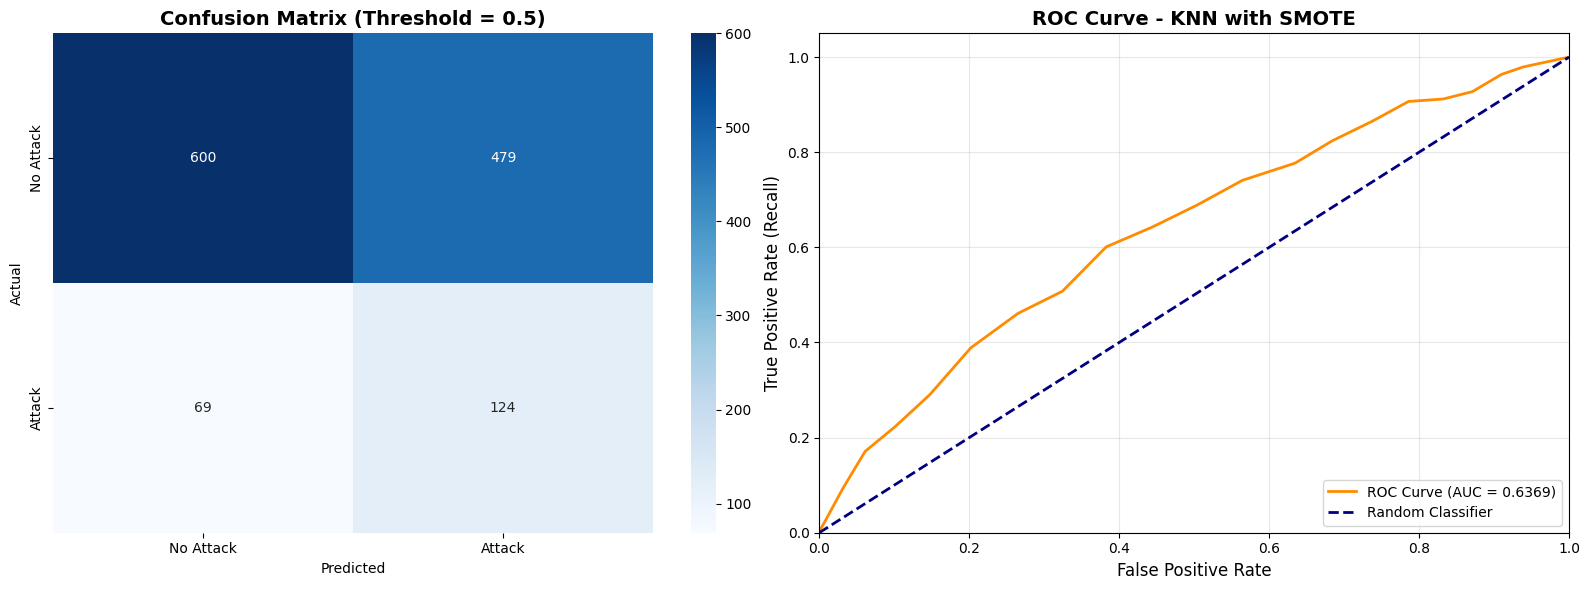


ROC-AUC Score: 0.6369

Classification Report (Default Threshold = 0.5):
              precision    recall  f1-score   support

   No Attack       0.90      0.56      0.69      1079
      Attack       0.21      0.64      0.31       193

    accuracy                           0.57      1272
   macro avg       0.55      0.60      0.50      1272
weighted avg       0.79      0.57      0.63      1272



In [122]:
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Attack', 'Attack'],
            yticklabels=['No Attack', 'Attack'])
plt.title('Confusion Matrix (Threshold = 0.5)', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()


roc_auc = auc(fpr_test, tpr_test)

plt.subplot(1,2,2)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, 
         label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve - KNN with SMOTE', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nROC-AUC Score: {roc_auc:.4f}")

print("\nClassification Report (Default Threshold = 0.5):")
print(classification_report(y_test, y_test_pred, 
                           target_names=['No Attack', 'Attack']))


## maximize recall on different threshold
thresholds_to_try = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]
results = []

for threshold in thresholds_to_try:
    y_pred = (y_proba_test >= threshold).astype(int)
    
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Get confusion matrix values
    cm_temp = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm_temp.ravel()
    
    results.append({
        'Threshold': threshold,
        'Recall': recall,
        'Precision': precision,
        'F1-Score': f1,
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    })

final_results=pd.DataFrame(results)

In [123]:
final_results

,Threshold,Recall,Precision,F1-Score,TP,FP,FN,TN
0,0.20,0.906736,0.171065,0.287829,175,848,18,231
1,0.25,0.865285,0.173416,0.288927,167,796,26,283
2,0.30,0.823834,0.177258,0.291743,159,738,34,341
3,0.35,0.777202,0.179641,0.291829,150,685,43,394
4,0.40,0.740933,0.190160,0.302646,143,609,50,470
5,0.45,0.689119,0.196455,0.305747,133,544,60,535
6,0.50,0.642487,0.205638,0.311558,124,479,69,600
7,0.55,0.601036,0.219282,0.321330,116,413,77,666
8,0.60,0.507772,0.218750,0.305772,98,350,95,729
9,0.65,0.461140,0.237333,0.313380,89,286,104,793


#### Choosing Optimal Threshold = 0.4

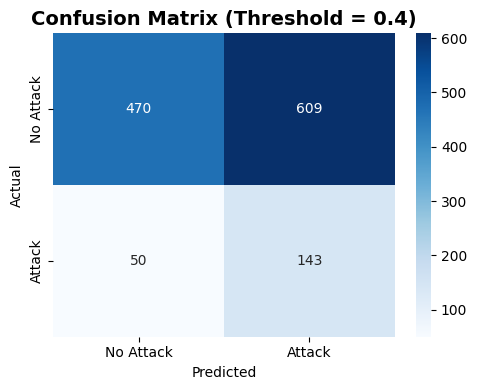


Classification Report (Optimal Threshold = 0.4):
              precision    recall  f1-score   support

   No Attack       0.90      0.44      0.59      1079
      Attack       0.19      0.74      0.30       193

    accuracy                           0.48      1272
   macro avg       0.55      0.59      0.45      1272
weighted avg       0.80      0.48      0.54      1272



In [124]:
optimal_threshold=0.4
plt.figure(figsize=(5,4))

y_pred = (y_proba_test >= optimal_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Attack', 'Attack'],
            yticklabels=['No Attack', 'Attack'])
plt.title('Confusion Matrix (Threshold = 0.4)', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\nClassification Report (Optimal Threshold = 0.4):")
print(classification_report(y_test, y_pred, 
                           target_names=['No Attack', 'Attack']))